In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("C:\Marmika\Life Expectancy Data.csv")

In [4]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
data.columns = data.columns.str.strip()

In [7]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
num_col = ['Life expectancy', 'Adult Mortality', 'Alcohol', 'BMI', 'Total expenditure', 
'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 
'Income composition of resources', 'Schooling']

for col in num_col:
    data[col] = data[col].fillna(data[col].mean())

In [10]:
cat_col = ['Polio', 'Hepatitis B','Diphtheria']

for col in cat_col:
    data[col] = data[col].fillna(data[col].mode()[0])

In [15]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

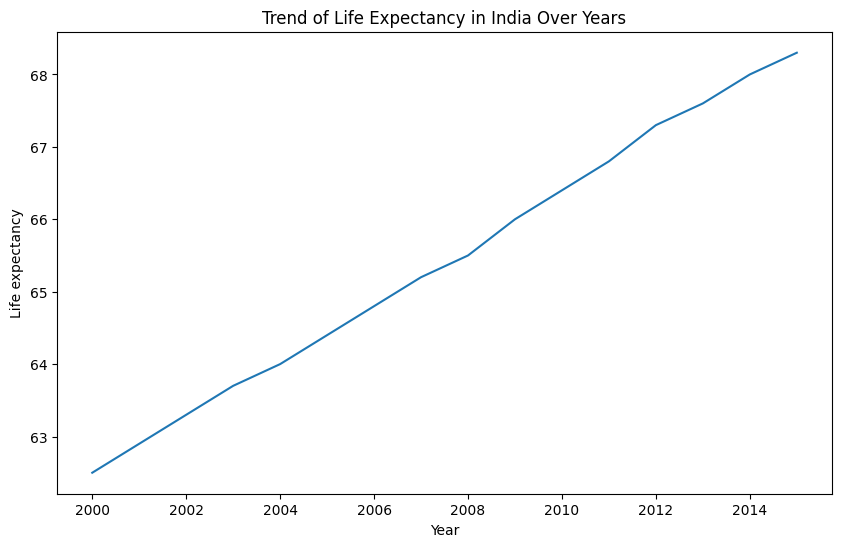

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data[data['Country'] == 'India'], x="Year", y="Life expectancy")
plt.title("Trend of Life Expectancy in India Over Years")
plt.show()

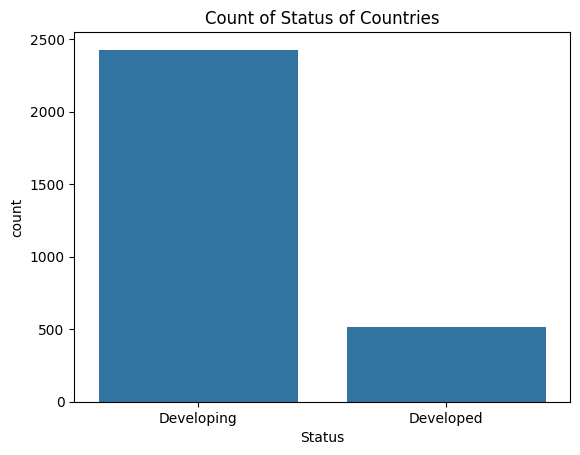

In [13]:
sns.countplot(x=data['Status'])
plt.title('Count of Status of Countries')
plt.show()

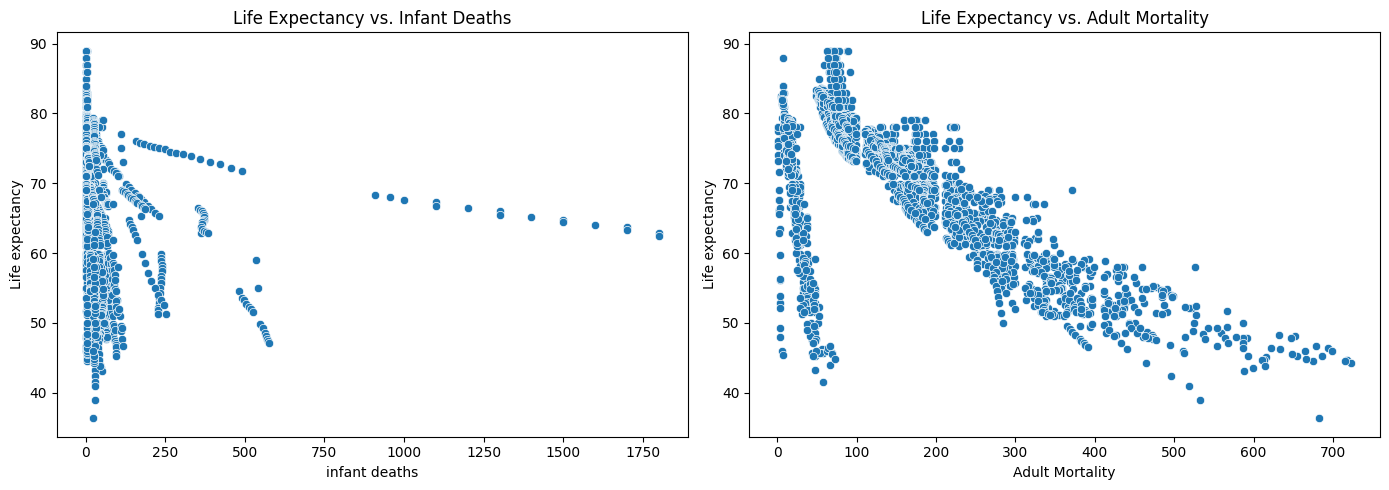

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(data=data, x="infant deaths", y="Life expectancy", ax=axes[0])
axes[0].set_title("Life Expectancy vs. Infant Deaths")

sns.scatterplot(data=data, x="Adult Mortality", y="Life expectancy", ax=axes[1])
axes[1].set_title("Life Expectancy vs. Adult Mortality")
plt.tight_layout()
plt.show()

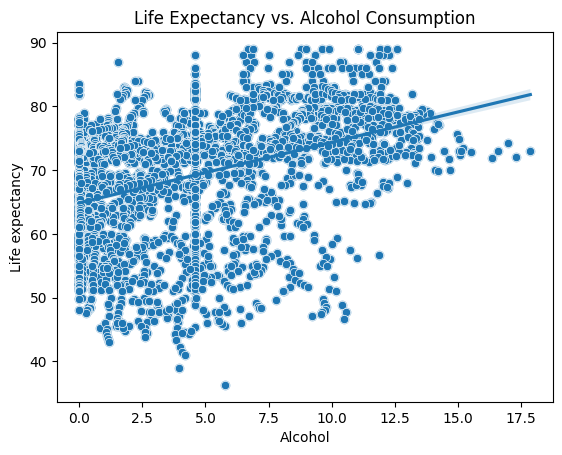

In [22]:
sns.regplot(data=data, x="Alcohol", y="Life expectancy", scatter_kws={'alpha':0.5})
sns.scatterplot(data=data, x="Alcohol", y="Life expectancy")
plt.title("Life Expectancy vs. Alcohol Consumption")
plt.show()

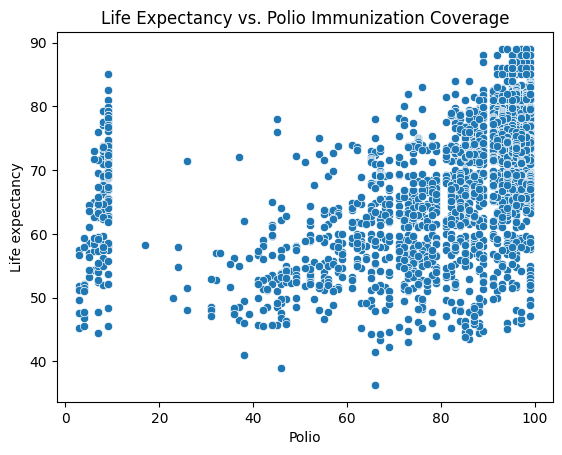

In [15]:
sns.scatterplot(data=data, x="Polio", y="Life expectancy")
plt.title("Life Expectancy vs. Polio Immunization Coverage")
plt.show()

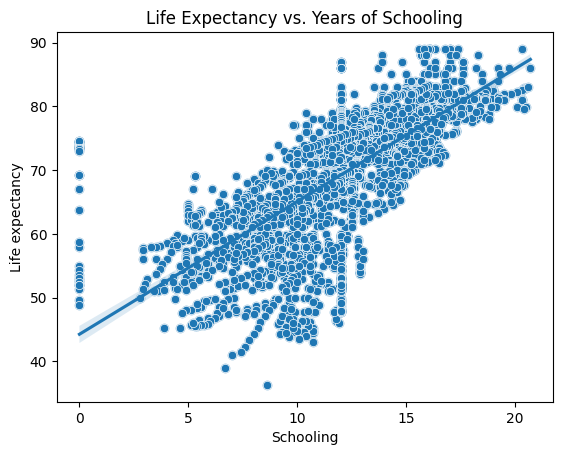

In [23]:
sns.regplot(data=data, x="Schooling", y="Life expectancy", scatter_kws={'alpha':0.5})
sns.scatterplot(data=data, x="Schooling", y="Life expectancy")
plt.title("Life Expectancy vs. Years of Schooling")
plt.show()

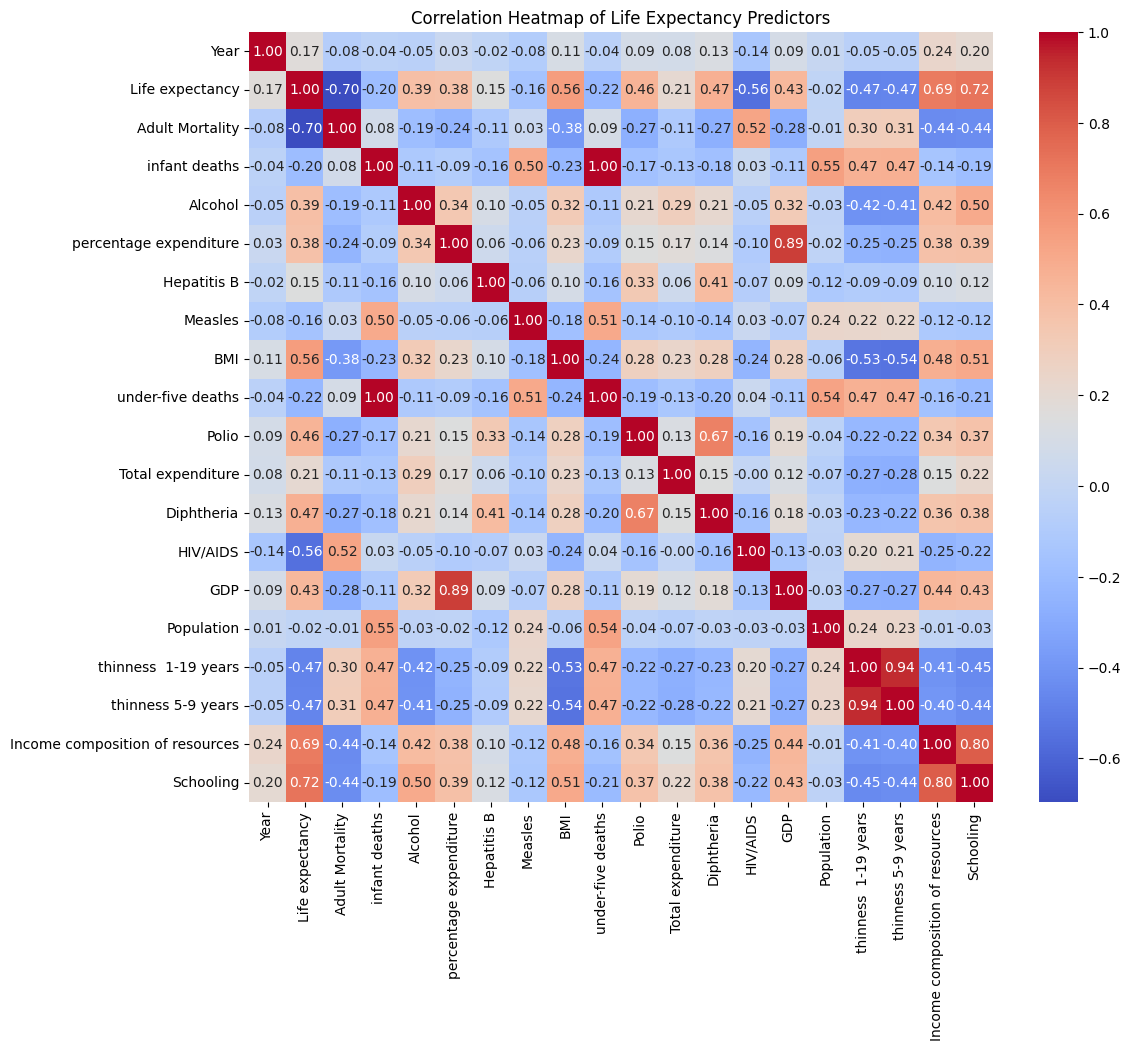

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Life Expectancy Predictors")
plt.show()